In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
data_train=pd.read_csv("E:/机器学习/kaggle_learn/House_price/train.csv")
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

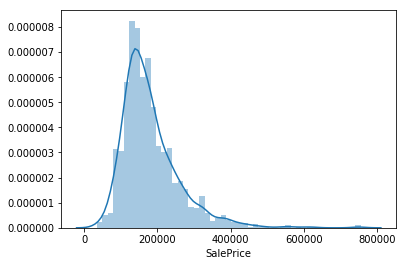

In [5]:
#图示销售价格， 房屋销售价格有正态分布趋势
sns.distplot(data_train['SalePrice'])

In [6]:
#查看数据的峰度（Kurtosis）和偏度(Skewness)
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


(-0.5, 1.5, 0, 800000)

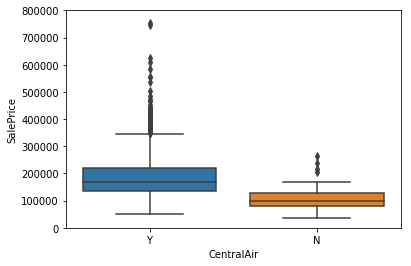

In [10]:
#人为选取主要特征，并验证主要特征是否满足要求
#中央空调，通过盒图来展示效果
var='CentralAir'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)

(-0.5, 9.5, 0, 800000)

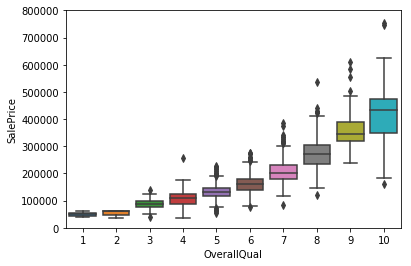

In [11]:
# 可以看出有中央空调的房价明显更高
#下面进行OverallQual总体评价
var='OverallQual'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)

(-0.5, 111.5, 0, 800000)

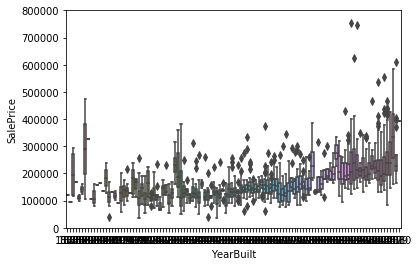

In [12]:
# YearBuilt boxplot
var='YearBuilt'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)

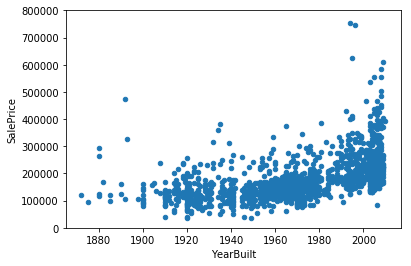

In [13]:
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

(-0.5, 24.5, 0, 800000)

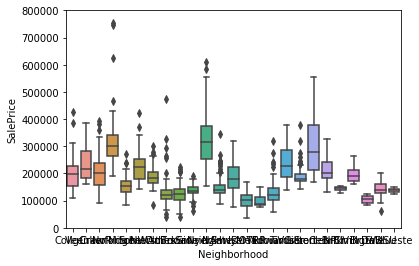

In [14]:
#Neighborhood地段
var='Neighborhood'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)

In [15]:
#地段目前看不出什么规律
location=[]
for x in data['Neighborhood']:
    if x not in location:
        location.append(x)
data.sort_values(['Neighborhood','SalePrice'])
nb_data=data


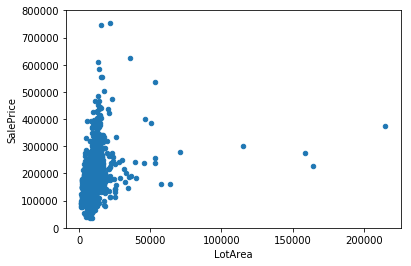

In [16]:
#地表面积
var  = 'LotArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

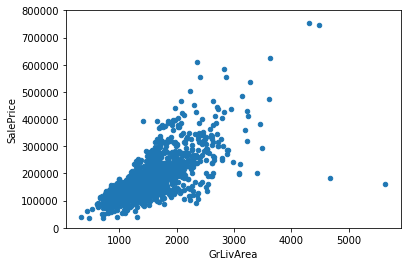

In [18]:
#GrlivArea 生活面积
var  = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

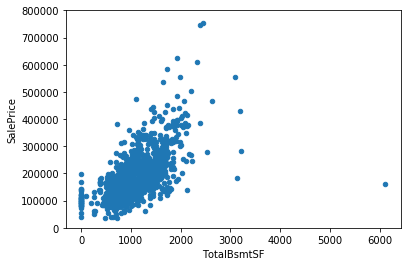

In [19]:
#TotalBsmtSF 总的地下室面积
var  = 'TotalBsmtSF'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

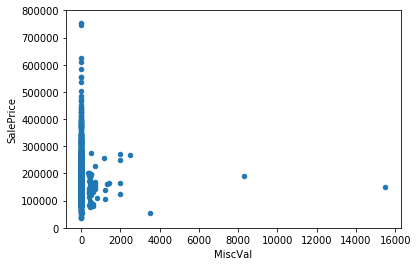

In [20]:
#MiscVal其他资产
var  = 'MiscVal'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

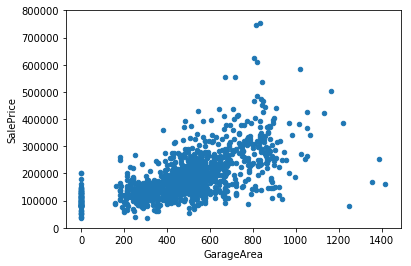

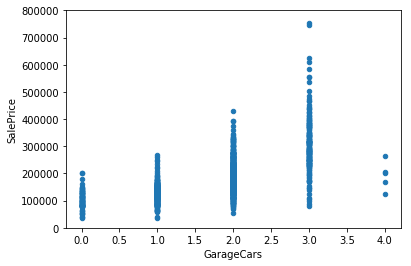

In [21]:
#GarageArea/GarageCars
var  = ['GarageArea', 'GarageCars']
for index in range(2):
    data = pd.concat([data_train['SalePrice'], data_train[var[index]]], axis=1)
    data.plot.scatter(x=var[index], y='SalePrice', ylim=(0, 800000))

# 更加科学的分析数据

上面基于经验的人为特征删选方法得到的结果很主观，接下来使用更加科学的分析
下面进行更加科学的分析

 1.得到得到各个特征之间的关系矩阵（correlation matrix）
 2.'SalePrice'的关系矩阵
 3.绘制出最相关的特征之间的关系图

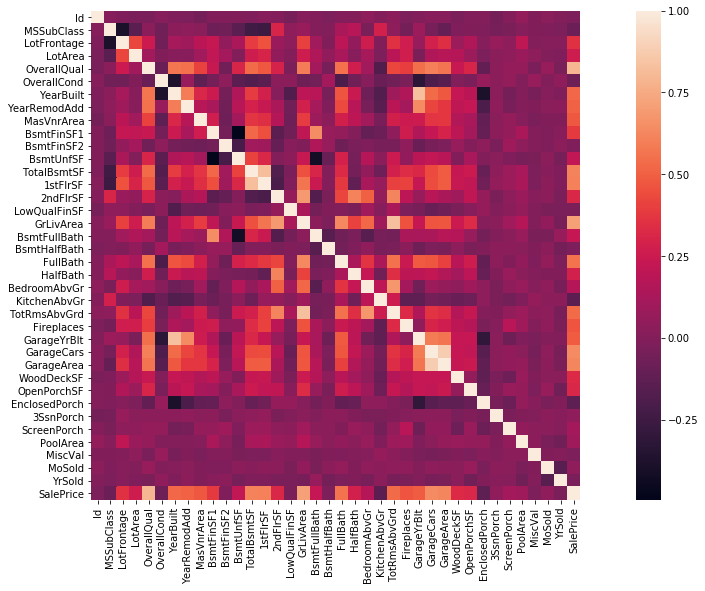

In [23]:
# 关系矩阵
corrmat=data_train.corr()
f, ax=plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax=1,square=True)

从上面的相关性热图可以看出，颜色越淡，相关性越强，我们可以很清楚的看到与“SalePrice”相关性很强的有：

- OverallQual：总评价
- YearBuilt：建造年份
- ToatlBsmtSF：地下室面积
- 1stFlrSF：一楼面积
- GrLiveArea：生活区面积？
- FullBath：浴室
- TotRmsAbvGrd：总房间数（不包括浴室）
- GarageCars：车库可容纳车辆数
- GarageArea：车库面积

####  值得注意的是上面的矩阵都是数值型的，类别型的数据并没有参与到相关性计算，所以下面尝试着使用sklearn来对这些特征进行处理

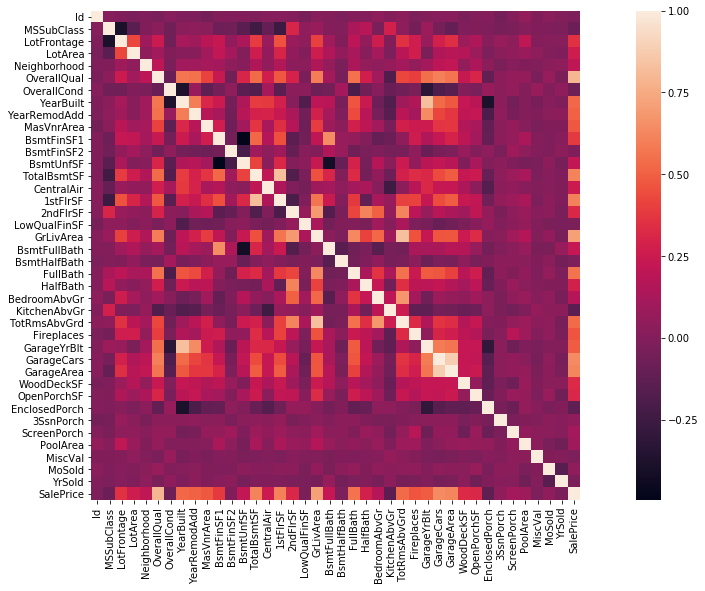

In [24]:
from sklearn import preprocessing
f_names=['CentralAir','Neighborhood']
for x in f_names:
    label=preprocessing.LabelEncoder()
    data_train[x]=label.fit_transform(data_train[x])
corrmat=data_train.corr()
f, ax= plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat,square=True)

由上图可以看出“CentraAir”,"Neighborhood"这两个特征对房价的影响并不大，后面将不予考虑

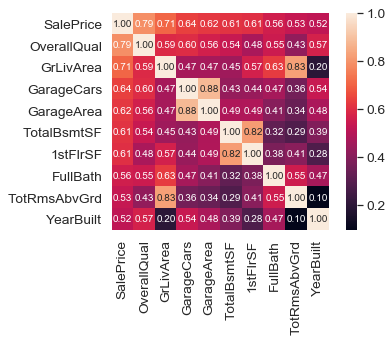

In [25]:
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

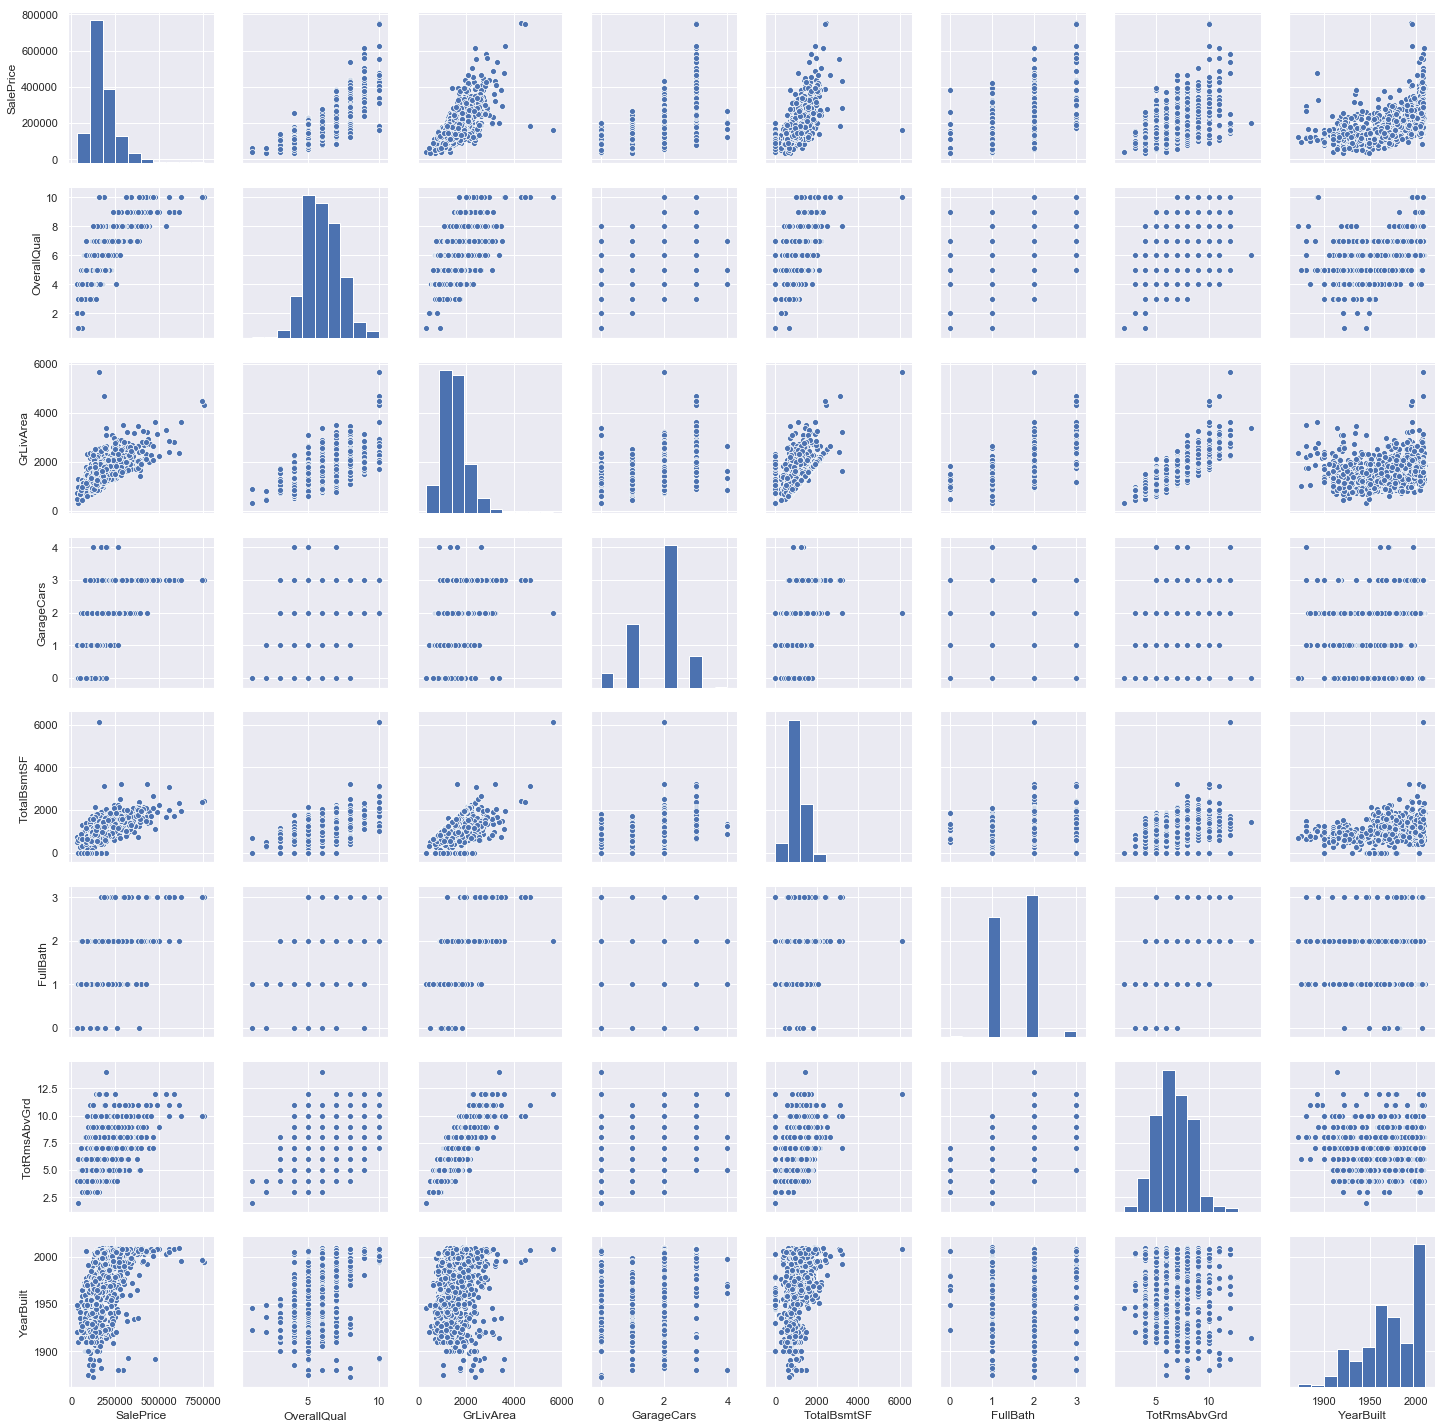

In [26]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)

## 开始训练数据


In [28]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np


In [29]:
# 获取数据
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x=data_train[cols].values
y=data_train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

In [30]:
clfs={
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm cost:-17.967306347608577
RandomForestRegressor cost:-2.479430730408508
BayesianRidge cost:-17.191504692911625


## 检验测试集数据

In [31]:
data_test=pd.read_csv("E:/机器学习/kaggle_learn/House_price/test.csv")
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [38]:
#以均值填充缺失值
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
my_imputer.fit_transform(data_test[cols])

array([[5.000e+00, 8.960e+02, 1.000e+00, ..., 1.000e+00, 5.000e+00,
        1.961e+03],
       [6.000e+00, 1.329e+03, 1.000e+00, ..., 1.000e+00, 6.000e+00,
        1.958e+03],
       [5.000e+00, 1.629e+03, 2.000e+00, ..., 2.000e+00, 6.000e+00,
        1.997e+03],
       ...,
       [5.000e+00, 1.224e+03, 2.000e+00, ..., 1.000e+00, 7.000e+00,
        1.960e+03],
       [5.000e+00, 9.700e+02, 0.000e+00, ..., 1.000e+00, 6.000e+00,
        1.992e+03],
       [7.000e+00, 2.000e+03, 3.000e+00, ..., 2.000e+00, 9.000e+00,
        1.993e+03]])

In [39]:
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [40]:
cols2 = ['OverallQual','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
cars = data_test['GarageCars'].fillna(1.766118)
bsmt = data_test['TotalBsmtSF'].fillna(1046.117970)
data_test_x = pd.concat( [data_test[cols2], cars, bsmt] ,axis=1)
data_test_x.isnull().sum()

OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [44]:
x = data_test_x.values
clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_te_pred = clf.predict(x)
print(y_te_pred)
print(y_te_pred.shape)
print(x.shape)

[2.05069893 2.05069893 2.09863614 ... 2.09863614 2.04604702 1.60951469]
(1459,)
(1459, 7)


In [46]:
prediction=pd.DataFrame(y_te_pred,columns=['SalePrice'])
result=pd.concat([data_test['Id'],prediction],axis=1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [52]:
#保存预测数据
result.to_csv("Predictions.csv",index=False)